# Introduction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('ex2data2.txt', header = None, names = ['Microchip Test 1', 'Microchip Test 2', 'Status'])
df.sample(5)

,Microchip Test 1,Microchip Test 2,Status
104,-0.15035,-0.36769,0
2,-0.21371,0.69225,1
88,-0.40380,0.70687,0
49,0.32200,0.69225,1
20,-0.60541,0.59722,1


In [2]:
X = df.drop(['Status'], axis = 1)
y = df['Status']
m = len(y)

X.insert(0, 'Bias', 1)

theta = np.zeros(3)

# Need for polynomail fit 

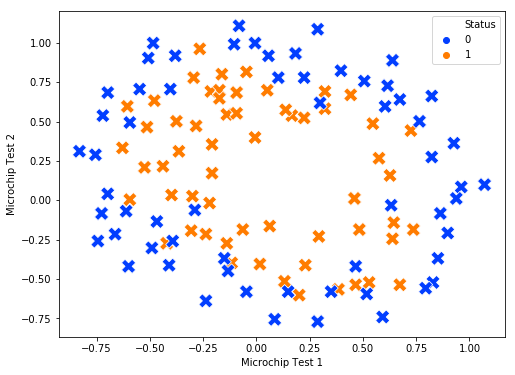

In [3]:
import seaborn as sns

plt.figure(figsize = (8, 6))
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
plt.show()

# Optimizing cost function 

In [4]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

def hypothesis(theta, X):
    z = np.dot(X, theta)
    return sigmoid(z)

def cost_function(theta, X, y):
    
    first_term = np.dot(np.log(hypothesis(theta, X)), y)
    second_term = np.dot(np.log(1 - hypothesis(theta, X)), 1 - y)
    
    return - 1/m *  (first_term + second_term)

def gradient(theta, X, y):
    
    temp = hypothesis(theta, X) - y
    return 1/m * np.dot(temp, X)

In [5]:
print('Cost function : \t', cost_function(theta, X, y))
print('Initial gradient : \t', gradient(theta, X, y))

Cost function : 	 0.6931471805599454
Initial gradient : 	 [8.47457627e-03 1.87880932e-02 7.77711864e-05]


In [6]:
import scipy.optimize as opt

alpha = 0.01

min_at = opt.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, args = (X, y))[0]

print('(Theta_0, Theta_1, Theta_2) : \t\t', min_at)
print('The minimum value of cost function: \t', cost_function(min_at, X, y))

(Theta_0, Theta_1, Theta_2) : 		 [-0.01418037 -0.30356918 -0.01812412]
The minimum value of cost function: 	 0.6902411220928226


# Polynomial features 

In [7]:
def poly_features(X, degree):
    
    X_1 = pd.DataFrame()
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            X_1['power_' + str(i - j) + str(j)] = np.power(X.iloc[:, 1], i - j) * np.power(X.iloc[:, 2], j)
    
    X_1.insert(0, 'Bias', 1)
    return X_1

In [8]:
poly_features(X, 3).head()

,Bias,power_10,power_01,power_20,power_11,power_02,power_30,power_21,power_12,power_03
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960


# Optimization at different order of polynomial

In [9]:
def theta_min(X, degree):
    X1 = poly_features(X, degree)
    theta_i = np.zeros(np.shape(X1)[1])
    
    return opt.fmin_tnc(func = cost_function, x0 = theta_i, fprime = gradient, args = (X1, y))[0]
    

In [10]:
theta_min(X, 3)

array([  5.13922684,   2.70653872,   4.81764423, -12.38033106,
        -8.43199919, -11.55326765,   0.57713288,   0.8639865 ,
         2.7924486 ,  -1.33264757])

In [11]:
print('(Theta_0, Theta_1, Theta_2, ......, Theta_?) : \n\n', theta_min(X, 3)[:, np.newaxis])
print('\n The minimum value of cost function: \t', cost_function(theta_min(X, 3), poly_features(X, 3), y))

(Theta_0, Theta_1, Theta_2, ......, Theta_?) : 

 [[  5.13922684]
 [  2.70653872]
 [  4.81764423]
 [-12.38033106]
 [ -8.43199919]
 [-11.55326765]
 [  0.57713288]
 [  0.8639865 ]
 [  2.7924486 ]
 [ -1.33264757]]

 The minimum value of cost function: 	 0.34472770153731025


# Prediction by different order of polynomial 

In [12]:
def prediction(X, degree):
    th = theta_min(X, degree)
    pth = poly_features(X, degree)
    
    pred = hypothesis(th, pth) > 0.5
    
    return np.mean(y == pred)

In [13]:
for i in range(1, 9):
    print('For', i, 'th order polynomial the accuracy of the prediction is: \t', prediction(X, i))

For 1 th order polynomial the accuracy of the prediction is: 	 0.5508474576271186
For 2 th order polynomial the accuracy of the prediction is: 	 0.8559322033898306
For 3 th order polynomial the accuracy of the prediction is: 	 0.847457627118644
For 4 th order polynomial the accuracy of the prediction is: 	 0.847457627118644
For 5 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762
For 6 th order polynomial the accuracy of the prediction is: 	 0.8728813559322034
For 7 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762
For 8 th order polynomial the accuracy of the prediction is: 	 0.8898305084745762


# Making grids to find decision boundary 

In [14]:
X1_range = np.linspace(-1, 1.5)
X2_range = np.linspace(-1, 1.5)
X11_range, X22_range = np.meshgrid(X1_range, X2_range)

In [15]:
grid_list = [[0,0]]
for i in X1_range:
    for j in X2_range:
        grid_list.append([i, j])
        
grid_df = pd.DataFrame(grid_list).drop(0)
grid_df.insert(0, 'Bias', 1)

In [16]:
def grid_hypo(X, degree, data):
    
    theta_i = theta_min(X, degree)
    poly_i = poly_features(data, degree)
    
    return hypothesis(theta_i, poly_i)

In [17]:
grid_hypo(X, 3, grid_df)

array([4.44807821e-17, 3.13531310e-16, 2.09185619e-15, ...,
       2.17697210e-19, 3.65873438e-20, 5.74195267e-21])

# Decision boundary for different polynomial 

In [18]:
import seaborn as sns

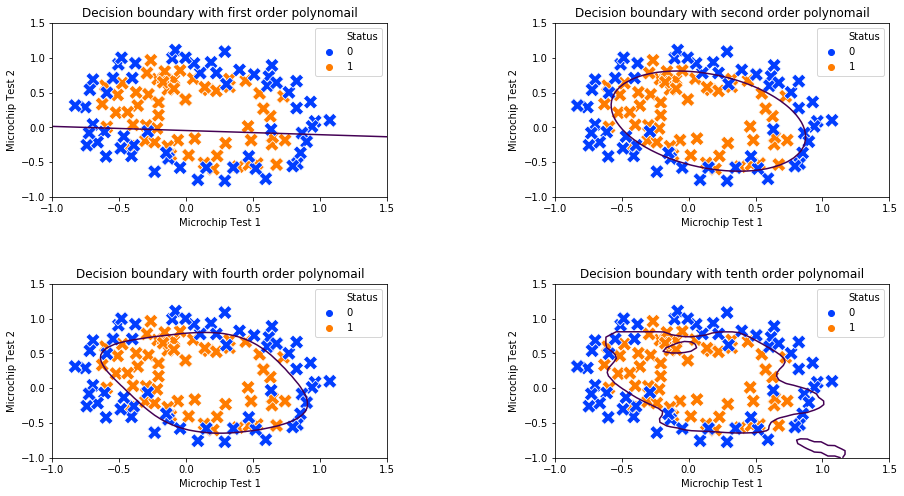

In [19]:
import warnings
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

fig = plt.figure(figsize= (15, 8))

ax = fig.add_subplot(221)
ax.contour(X1_range, X2_range, grid_hypo(X, 1, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with first order polynomail')

ax = fig.add_subplot(222)
ax.contour(X1_range, X2_range, grid_hypo(X, 2, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with second order polynomail')

ax = fig.add_subplot(223)
ax.contour(X1_range, X2_range, grid_hypo(X, 4, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with fourth order polynomail')

ax = fig.add_subplot(224)
ax.contour(X1_range, X2_range, grid_hypo(X, 10, grid_df).reshape(50, 50), [0.5])
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
ax.set_title('Decision boundary with tenth order polynomail')

fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.show()

First order polynomial is a straight line. It is doing worst job in classifying things. 
Second order polynomial give some conic section. It is ellipse in this case. It significantly improves the performance. 
Higher order polynomilas give complicated curve and may be prone to overfit, which is clearly evident in the tenth order polynomial.

# Changing the cut off 

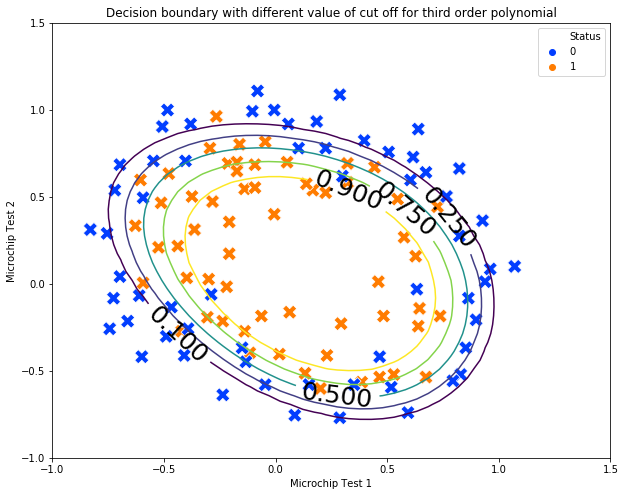

In [20]:
plt.figure(figsize= (10, 8))
cs = plt.contour(X1_range, X2_range, grid_hypo(X, 3, grid_df).reshape(50, 50), [0.1, 0.25, 0.5, 0.75, 0.9])
sns.scatterplot(x ='Microchip Test 1', y = 'Microchip Test 2', hue = 'Status', 
                data = df, marker = 'X', s = 200, palette = 'bright')
plt.clabel(cs, inline = 10, fontsize = 25, colors = 'k')
plt.title('Decision boundary with different value of cut off for third order polynomial')
plt.show()

# Regularization 

# Scikit learn 

# Statsmodel 

... to be continued 